

---


# Bach Chorale Project


---



Task:

Download the Bach chorales dataset and unzip it. It is composed of 382 chorales composed by Johann Sebastian Bach. Each chorale is 100 to 640 time steps long, and each time step contains 4 integers, where each integer corresponds to a note’s index on a piano (except for the value 0, which means that no note is played).

Train a model—recurrent, convolutional, or both—that can predict the next time
step (four notes), given a sequence of time steps from a chorale. Then use this
model to generate Bach-like music, one note at a time: you can do this by giving
the model the start of a chorale and asking it to predict the next time step, then appending these time steps to the input sequence and asking the model for the next note, and so on.

# Load  Our Data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filepath = tf.keras.utils.get_file(
    "jsb_chorales.tgz",
    "https://github.com/ageron/data/raw/main/jsb_chorales.tgz",
    cache_dir=".",
    extract=True)

117793/117793 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
if "_extracted" in filepath:
    jsb_chorales_dir = Path(filepath) / "jsb_chorales"
else:
    jsb_chorales_dir = Path(filepath).with_name("jsb_chorales")

train_files = sorted(jsb_chorales_dir.glob("train/chorale_*.csv"))
valid_files = sorted(jsb_chorales_dir.glob("valid/chorale_*.csv"))
test_files = sorted(jsb_chorales_dir.glob("test/chorale_*.csv"))

In [4]:
def load_chorales(filepaths):
    return [pd.read_csv(filepath).values.tolist() for filepath in filepaths]

train_chorales = load_chorales(train_files)
valid_chorales = load_chorales(valid_files)
test_chorales = load_chorales(test_files)

# Data Preprocessing

In [ ]:
df_0=pd.DataFrame(train_chorales[0])

<Axes: >

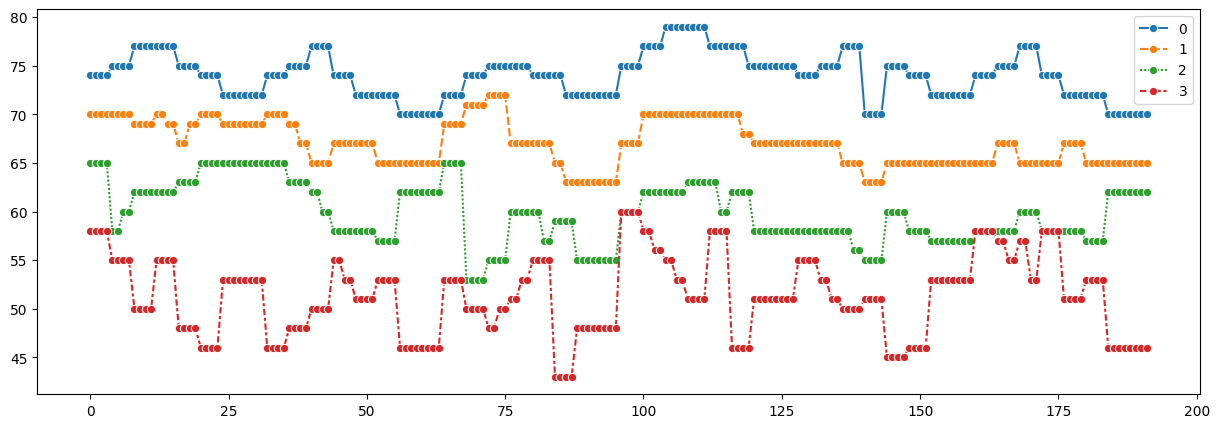

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_0,marker='o',legend=True)

* I make a function to transform our data to Dataframe

In [ ]:
def make_dataframe(array):
  df=pd.DataFrame()
  for i in range(len(array)):
    df_new=pd.DataFrame(array[i])
    df=pd.concat([df,df_new],axis=0)
  return df

In [ ]:
train_df=make_dataframe(train_chorales)

In [ ]:
train_df.head(5)

,0,1,2,3
0,74,70,65,58
1,74,70,65,58
2,74,70,65,58
3,74,70,65,58
4,75,70,58,55


In [ ]:
valid_df=make_dataframe(valid_chorales)
test_df=make_dataframe(test_chorales)

In [ ]:
len(train_df),len(valid_df),len(test_df)

(55228, 18408, 18900)

<Axes: >

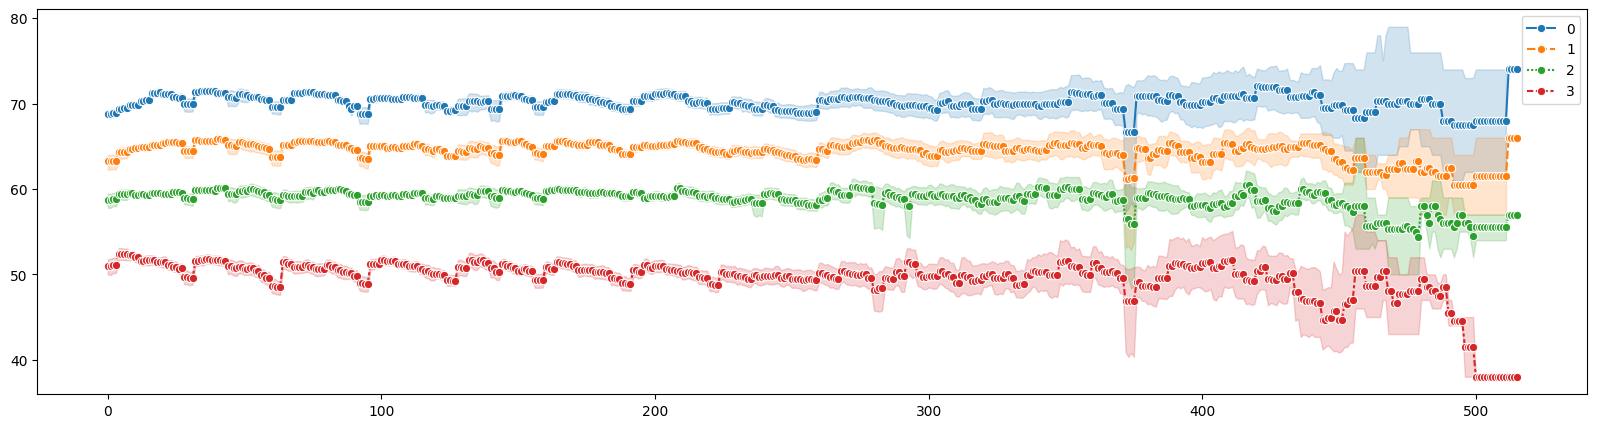

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=train_df,marker='o',legend=True)

<Axes: ylabel='1'>

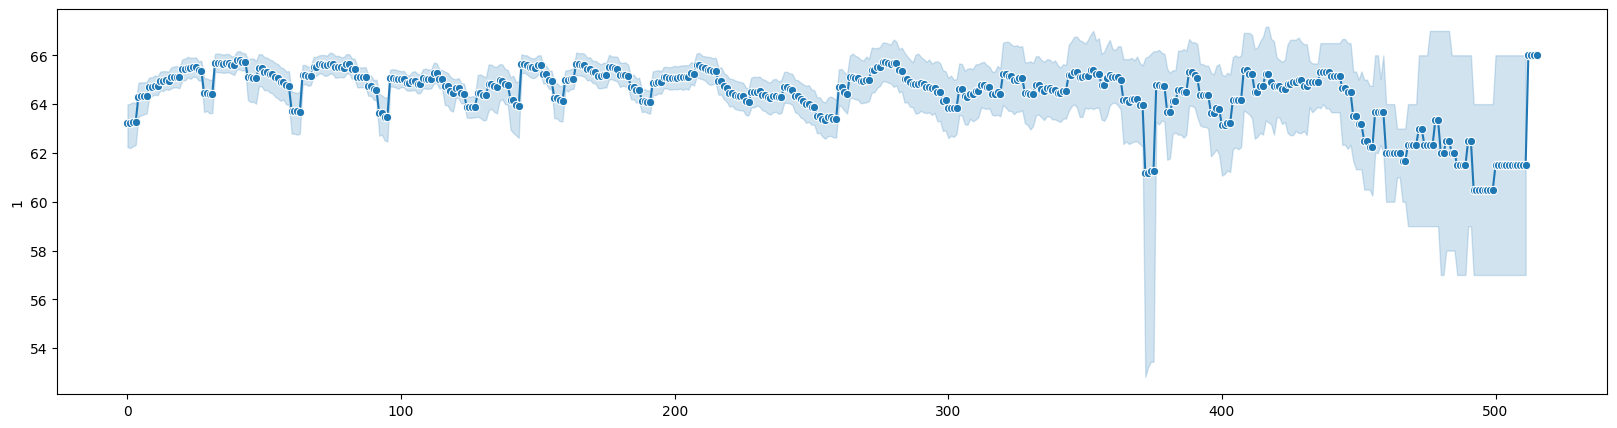

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=train_df[1],marker='o',legend=True)

# Let's Make Our DataSets (Predict Next 4 Notes At A Time)

In [ ]:
seq_len=50

train_ds=tf.keras.preprocessing.timeseries_dataset_from_array(train_df.to_numpy(),
                                                              sequence_length=seq_len,
                                                              targets=train_df.to_numpy()[seq_len:],
                                                              batch_size=32,
                                                              shuffle=True)




In [ ]:
valid_ds=tf.keras.preprocessing.timeseries_dataset_from_array(valid_df.to_numpy(),
                                                              sequence_length=seq_len,
                                                              targets=valid_df.to_numpy()[seq_len:],
                                                              batch_size=32,
                                                              )
test_ds=tf.keras.preprocessing.timeseries_dataset_from_array(test_df.to_numpy(),
                                                              sequence_length=seq_len,
                                                              targets=test_df.to_numpy()[seq_len:])

* Model_1

In [ ]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(seq_len,4)),
    tf.keras.layers.GRU(128,return_sequences=True),
    tf.keras.layers.GRU(128,return_sequences=False),
    tf.keras.layers.Dense(4)
])

In [ ]:
model_1.compile(loss='mae',
              optimizer=tf.keras.optimizers.Nadam(),
              metrics=['mse'])

In [ ]:
model_1.fit(train_ds,epochs=50,validation_data=valid_ds)

Epoch 1/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - loss: 923.6718 - mse: 923.6718 - val_loss: 42.9668 - val_mse: 42.9668
Epoch 2/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - loss: 17.9285 - mse: 17.9285 - val_loss: 26.6227 - val_mse: 26.6227
Epoch 3/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - loss: 16.8980 - mse: 16.8980 - val_loss: 24.5611 - val_mse: 24.5611
Epoch 4/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - loss: 16.6496 - mse: 16.6496 - val_loss: 24.2926 - val_mse: 24.2926
Epoch 5/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - loss: 16.4535 - mse: 16.4535 - val_loss: 24.8029 - val_mse: 24.8029
Epoch 6/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - loss: 16.2676 - mse: 16.2676 - val_loss: 24.7028 - val_mse: 24.7028
Epoch 7/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - loss: 16.4523 - mse: 16.4523 - val_loss: 23.6669 - val_mse: 23.6669
Epoch 8/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - loss: 16.5254 - mse: 16.5254 - val_loss: 24.4924 - val_mse

* With Learning Rate Function

In [ ]:
def lr_schedule_exp(epoch):
  if epoch<40:
    return float(tf.exp(-epoch/10.)*0.01)/2
  else:
    return 0.0001/5
learning_rate_callback=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
checkpoint=tf.keras.callbacks.ModelCheckpoint('model_1.keras',monitor='val_loss',mode='min',save_best_only=True,verbose=1)

In [ ]:
history=model_1.fit(train_ds,epochs=50,validation_data=valid_ds,callbacks=[learning_rate_callback,checkpoint])

Epoch 1/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 333.1418 - mae: 10.2477
Epoch 1: val_loss improved from inf to 39.46776, saving model to model_1.keras
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - loss: 333.0044 - mae: 10.2446 - val_loss: 39.4678 - val_mae: 3.3721 - learning_rate: 0.0050
Epoch 2/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19.0863 - mae: 3.1202
Epoch 2: val_loss improved from 39.46776 to 26.72708, saving model to model_1.keras
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - loss: 19.0859 - mae: 3.1201 - val_loss: 26.7271 - val_mae: 3.2053 - learning_rate: 0.0045
Epoch 3/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 18.1025 - mae: 3.1123
Epoch 3: val_loss did not improve from 26.72708
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - loss: 18.1024 - mae: 3.1123 - val_loss: 31.7259 - val_mae: 3.2767 - learning_rate: 0.0041
Epoch 4/50
1724/1726 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 18.0126 - mae: 3.1124
Epoch 4: val_loss improved from 26

<Axes: >

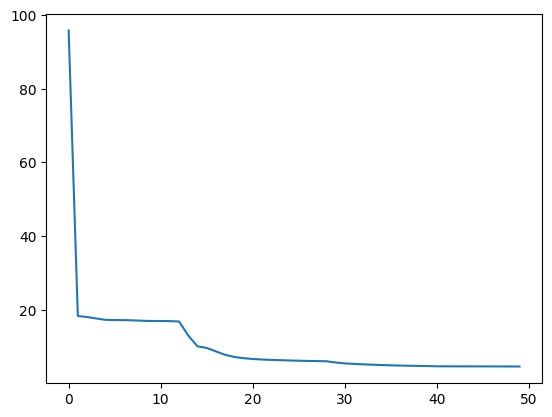

In [ ]:
sns.lineplot(history.history['loss'])

# I Will Make Our Data Into A Time Sires With One Note At A Time

In [ ]:
note_list=[]
for chorales in (train_chorales, valid_chorales, test_chorales):
    for chorale in chorales:
        for chord in chorale:
            for note in chord:
                if note not in note_list:
                    note_list.append(note)
                else:
                  pass

In [ ]:
un_notes=len(note_list)
print(f'We Have {len(note_list)} Unique Notes')
max_notes=max(note_list)
print(f'The Max Note is {max_notes}')
min_notes=min(note_list)
print(f'The Min Note is {min_notes}')

We Have 47 Unique Notes
The Max Note is 81
The Min Note is 0


In [5]:
train_list=[]
for item in (train_chorales):
  train_list= np.concat((train_list,np.reshape(item,(-1))),axis=0)

In [6]:
valid_list=[]
for item in (train_chorales):
  valid_list= np.concat((valid_list,np.reshape(item,(-1))),axis=0)

In [7]:
test_list=[]
for item in (test_chorales):
  test_list= np.concat((test_list,np.reshape(item,(-1))),axis=0)

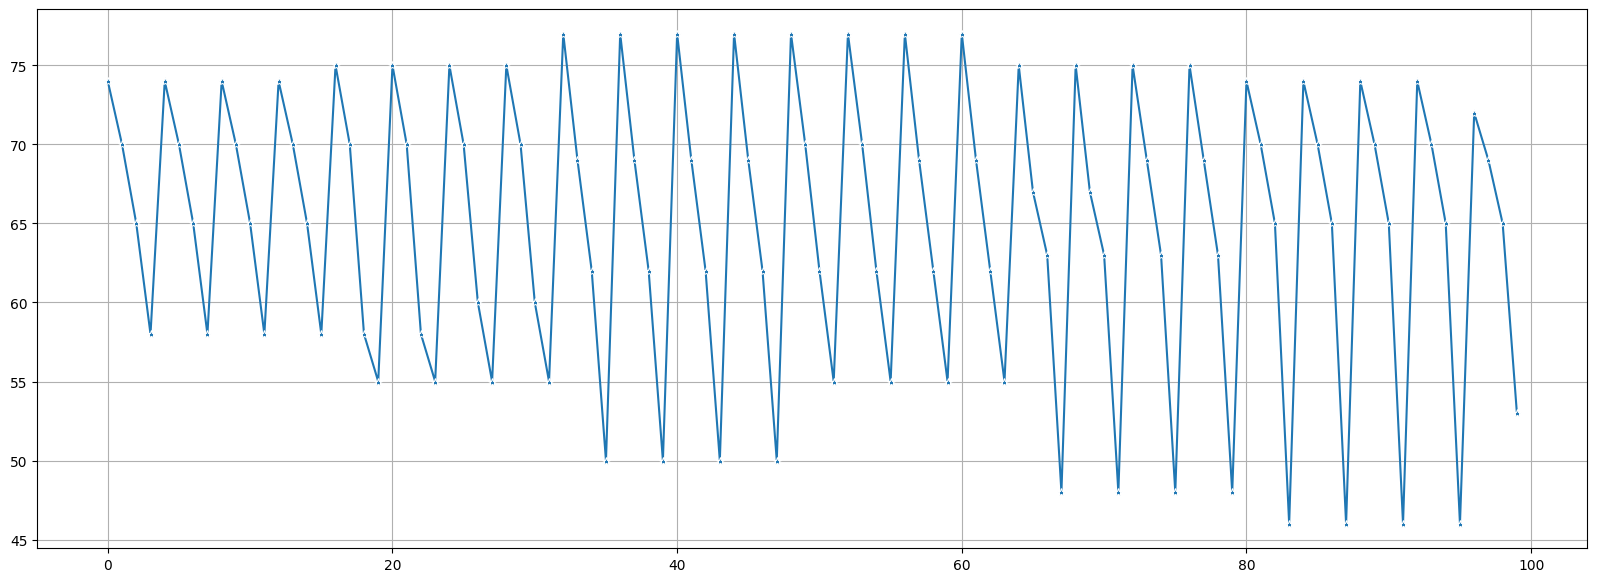

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(train_list[0:100],marker='*')
plt.grid(True)

In [ ]:
train_ds=tf.keras.preprocessing.timeseries_dataset_from_array(train_list,
                                                              sequence_length=128,
                                                              targets=train_list[128:], batch_size=32)


valid_ds=tf.keras.preprocessing.timeseries_dataset_from_array(valid_list,
                                                              sequence_length=128,
                                                              targets=valid_list[128:], batch_size=32)

In [ ]:
train_ds.element_spec

(TensorSpec(shape=(None, None), dtype=tf.float64, name=None),
 TensorSpec(shape=(None,), dtype=tf.float64, name=None))

In [ ]:
list(train_ds.take(1))

[(<tf.Tensor: shape=(32, 128), dtype=float64, numpy=
  array([[74., 70., 65., ..., 69., 65., 53.],
         [70., 65., 58., ..., 65., 53., 74.],
         [65., 58., 74., ..., 53., 74., 70.],
         ...,
         [70., 60., 55., ..., 63., 48., 75.],
         [60., 55., 77., ..., 48., 75., 67.],
         [55., 77., 69., ..., 75., 67., 63.]])>,
  <tf.Tensor: shape=(32,), dtype=float64, numpy=
  array([74., 70., 65., 46., 74., 70., 65., 46., 74., 70., 65., 46., 74.,
         70., 65., 46., 75., 69., 63., 48., 75., 69., 63., 48., 75., 67.,
         63., 48., 75., 67., 63., 48.])>)]

In [ ]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(None,1)),
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.LSTM(128,return_sequences=False),
    tf.keras.layers.Dense(1)
])
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, None, 128)      │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,017 (711.00 KB)

 Trainable params: 182,017 (711.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def lr_schedule_exp(epoch):
  if epoch<40:
    return float(tf.exp(-epoch/10.)*0.01)
  else:
    return 0.0001/5
learning_rate_callback=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
checkpoint=tf.keras.callbacks.ModelCheckpoint('model_2.keras',monitor='val_loss',mode='min',save_best_only=True,verbose=1)

In [ ]:
model_2.compile(loss='mae',
              optimizer=tf.keras.optimizers.Nadam(),
              metrics=['mse'])

In [ ]:
history=model_2.fit(train_ds,epochs=50,validation_data=valid_ds,callbacks=[learning_rate_callback,checkpoint])

Epoch 1/50
6900/6900 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.9550 - mse: 130.3003
Epoch 1: val_loss improved from inf to 6.93721, saving model to model_2.keras
6900/6900 ━━━━━━━━━━━━━━━━━━━━ 158s 22ms/step - loss: 7.9548 - mse: 130.2942 - val_loss: 6.9372 - val_mse: 81.8667 - learning_rate: 0.0100
Epoch 2/50
6900/6900 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.8948 - mse: 78.2336
Epoch 2: val_loss improved from 6.93721 to 6.93165, saving model to model_2.keras
6900/6900 ━━━━━━━━━━━━━━━━━━━━ 199s 22ms/step - loss: 6.8948 - mse: 78.2332 - val_loss: 6.9316 - val_mse: 81.1776 - learning_rate: 0.0090
Epoch 3/50
6897/6900 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.8791 - mse: 76.5729
Epoch 3: val_loss did not improve from 6.93165
6900/6900 ━━━━━━━━━━━━━━━━━━━━ 157s 23ms/step - loss: 6.8791 - mse: 76.5712 - val_loss: 6.9667 - val_mse: 79.9454 - learning_rate: 0.0082
Epoch 4/50
6900/6900 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.8523 - mse: 74.1184
Epoch 4: val_loss improved from 6.931

<Axes: >

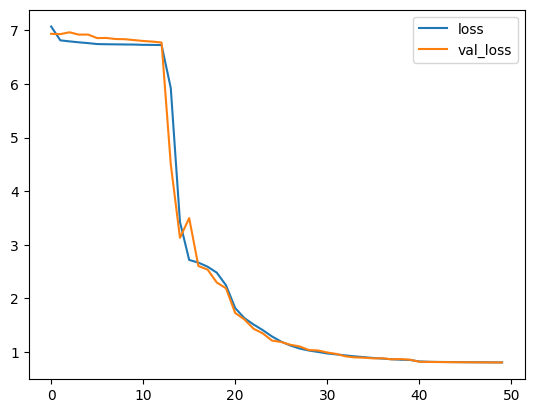

In [ ]:
sns.lineplot(history.history['loss'],label='loss')
sns.lineplot(history.history['val_loss'],label='val_loss')

# Beacouse In Music We Need To Be Accurate About The Notes, I Will Make A Seq_to_seq Dataset For A Classification Problem

In [8]:
def make_slide_windows(data,shift=14,seq_length=128):
  data=tf.data.Dataset.from_tensor_slices(data)
  data=data.window(seq_length+1,shift=shift+1,drop_remainder=True)
  data=data.flat_map(lambda window:window.batch(seq_length+1))
  return data.map(lambda window:(window[:-1],window[1:])).batch(32).prefetch(1)


In [9]:
train_ds=make_slide_windows(train_list)

In [10]:
valid_ds=make_slide_windows(valid_list)

In [ ]:
train_ds.element_spec

(TensorSpec(shape=(None, None), dtype=tf.float64, name=None),
 TensorSpec(shape=(None, None), dtype=tf.float64, name=None))

In [ ]:
train_ds=train_ds.repeat()


In [ ]:
list(train_ds.take(1))

[(<tf.Tensor: shape=(32, 128), dtype=float64, numpy=
  array([[74., 70., 65., ..., 69., 65., 53.],
         [58., 75., 70., ..., 74., 70., 65.],
         [60., 55., 77., ..., 48., 75., 67.],
         ...,
         [51., 79., 70., ..., 70., 63., 55.],
         [63., 58., 77., ..., 51., 75., 65.],
         [70., 62., 46., ..., 60., 45., 74.]])>,
  <tf.Tensor: shape=(32, 128), dtype=float64, numpy=
  array([[70., 65., 58., ..., 65., 53., 74.],
         [75., 70., 58., ..., 70., 65., 46.],
         [55., 77., 69., ..., 75., 67., 63.],
         ...,
         [79., 70., 63., ..., 63., 55., 51.],
         [58., 77., 70., ..., 75., 65., 60.],
         [62., 46., 77., ..., 45., 74., 65.]])>)]

# Model_2

In [ ]:
model=tf.keras.Sequential([])
model.add(tf.keras.layers.Input(shape=[None]))
model.add(tf.keras.layers.Embedding(input_dim=82,output_dim=7)),
model.add(tf.keras.layers.Conv1D(32, kernel_size=2, padding="causal", activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
for rate in (2,4,8):
  model.add(tf.keras.layers.Conv1D(filters=rate*15,padding='causal',kernel_size=2,activation='relu',dilation_rate=rate))
  model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LSTM(256,return_sequences=True)),
model.add(tf.keras.layers.Dense(82,activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, None, 7)        │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, None, 32)       │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, None, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, None, 30)       │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, None, 30)       │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, None, 60)       │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, None, 60)       │           240 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, None, 120)      │        14,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, None, 120)      │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, None, 256)      │       386,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, None, 82)       │        21,074 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,274 (1.64 MB)

 Trainable params: 428,790 (1.64 MB)

 Non-trainable params: 484 (1.89 KB)

In [ ]:
def lr_schedule_exp(epoch):
  if epoch<40:
    return float(tf.exp(-epoch/10.)*0.01)
  else:
    return 0.0001/5
learning_rate_callback=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
checkpoint=tf.keras.callbacks.ModelCheckpoint('model.keras',monitor='val_accuracy',mode='max',save_best_only=True,verbose=1)

In [ ]:

model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Nadam(),
              metrics=["accuracy"])
history=model.fit(train_ds, epochs=50, validation_data=valid_ds,callbacks=[learning_rate_callback,checkpoint])

Epoch 1/50
    460/Unknown 15s 22ms/step - accuracy: 0.5939 - loss: 1.5955

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 1: val_accuracy improved from -inf to 0.77022, saving model to model.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.5941 - loss: 1.5946 - val_accuracy: 0.7702 - val_loss: 0.8807 - learning_rate: 0.0100
Epoch 2/50
457/460 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7753 - loss: 0.8481
Epoch 2: val_accuracy improved from 0.77022 to 0.79409, saving model to model.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7754 - loss: 0.8478 - val_accuracy: 0.7941 - val_loss: 0.7497 - learning_rate: 0.0090
Epoch 3/50
458/460 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7961 - loss: 0.7313
Epoch 3: val_accuracy improved from 0.79409 to 0.80537, saving model to model.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.7962 - loss: 0.7312 - val_accuracy: 0.8054 - val_loss: 0.6737 - learning_rate: 0.0082
Epoch 4/50
458/460 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8093 - loss: 0.6603
Epoch 4: val_accuracy improved from 0.80537 to 0.81557, savi

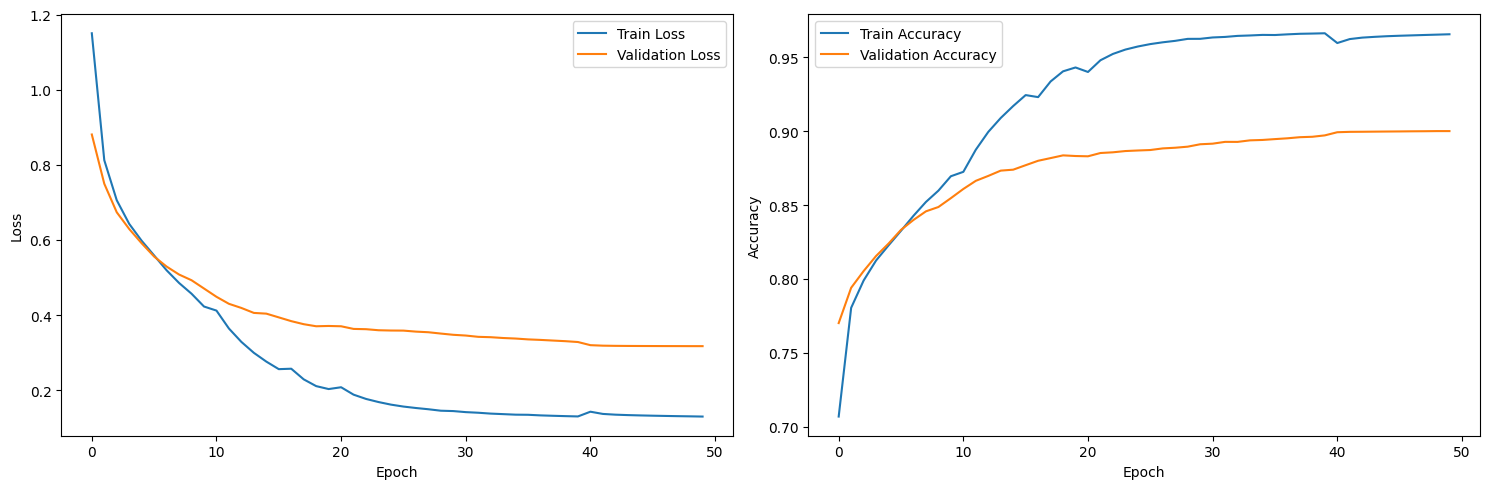

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].plot(history.history['loss'],label='Train Loss')
axes[0].plot(history.history['val_loss'],label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history.history['accuracy'],label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'],label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()

In [ ]:
model.save('Bach_model_2.keras')

In [ ]:
Model_Bach=tf.keras.models.load_model('Bach_model_2.keras')

In [ ]:
Model_Bach.evaluate(valid_ds)

460/460 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8972 - loss: 0.3277


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


[0.3174050748348236, 0.8999878764152527]

# Model_3

In [ ]:
model=tf.keras.Sequential([])
model.add(tf.keras.layers.Input(shape=[None]))
model.add(tf.keras.layers.Embedding(input_dim=82,output_dim=5)),
model.add(tf.keras.layers.Conv1D(32, kernel_size=2, padding="causal", activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
for rate in (2,4,8):
  model.add(tf.keras.layers.Conv1D(filters=rate*15,padding='causal',kernel_size=2,activation='relu',dilation_rate=rate))
  model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LSTM(256,return_sequences=True)),
model.add(tf.keras.layers.Dense(82,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, None, 5)        │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, None, 32)       │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, None, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, None, 30)       │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, None, 30)       │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, None, 60)       │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, None, 60)       │           240 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, None, 120)      │        14,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, None, 120)      │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, None, 256)      │       386,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, None, 82)       │        21,074 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 428,982 (1.64 MB)

 Trainable params: 428,498 (1.63 MB)

 Non-trainable params: 484 (1.89 KB)

In [ ]:
def lr_schedule_exp(epoch):
  if epoch<40:
    return float(tf.exp(-epoch/10.)*0.01)/2
  else:
    return 0.0001/5
learning_rate_callback=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
checkpoint=tf.keras.callbacks.ModelCheckpoint('model.keras',monitor='val_accuracy',mode='max',save_best_only=True,verbose=1)

In [ ]:

model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Nadam(),metrics=["accuracy"])
history=model.fit(train_ds, epochs=50, validation_data=valid_ds,callbacks=[learning_rate_callback,checkpoint],steps_per_epoch=460)

Epoch 1/50
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5845 - loss: 1.6617
Epoch 1: val_accuracy improved from -inf to 0.77994, saving model to model.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.5847 - loss: 1.6606 - val_accuracy: 0.7799 - val_loss: 0.8222 - learning_rate: 0.0050
Epoch 2/50
  4/460 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.7838 - loss: 0.8226 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7833 - loss: 0.8025
Epoch 2: val_accuracy improved from 0.77994 to 0.80287, saving model to model.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.7833 - loss: 0.8024 - val_accuracy: 0.8029 - val_loss: 0.6854 - learning_rate: 0.0045
Epoch 3/50
458/460 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8067 - loss: 0.6749
Epoch 3: val_accuracy improved from 0.80287 to 0.81850, saving model to model.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.8067 - loss: 0.6747 - val_accuracy: 0.8185 - val_loss: 0.6204 - learning_rate: 0.0041
Epoch 4/50
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8227 - loss: 0.6047
Epoch 4: val_accuracy improved from 0.81850 to 0.82639, saving model to model.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.8227 - loss: 0.6047 - val_accuracy: 0.8264 - val_loss: 0.5834 - learning_rate: 0.0037
Epoch 5/50
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.83

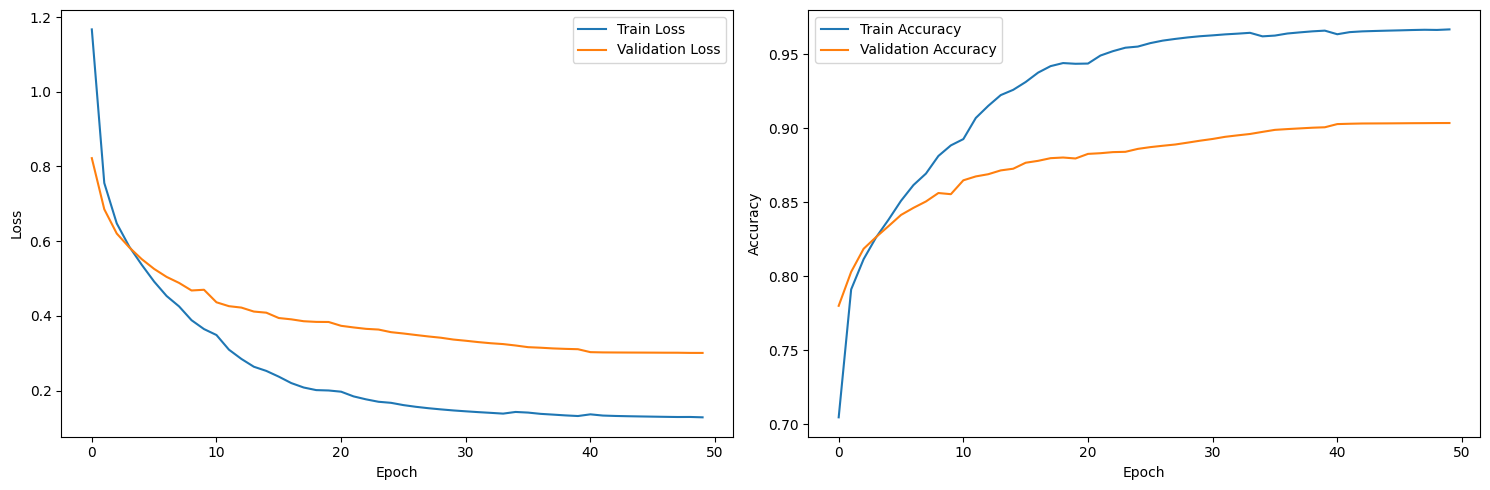

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].plot(history.history['loss'],label='Train Loss')
axes[0].plot(history.history['val_loss'],label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history.history['accuracy'],label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'],label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()

In [ ]:
model.evaluate(valid_ds)

460/460 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9007 - loss: 0.3120


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


[0.3006756603717804, 0.9034591913223267]

In [ ]:
model.save('Bach_model_9034.keras')

# I will use as train_ds the train_ds and test_ds also!

In [ ]:
len(test_list)

75600

In [ ]:
len(train_list)

220912

In [11]:
train_list_ext=np.concatenate((train_list,test_list),axis=0)

In [ ]:
len(train_list_ext)

296512

In [12]:
train_ds_ext=make_slide_windows(train_list_ext)

In [13]:
train_ds_ext=train_ds_ext.repeat()

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Nadam(),metrics=["accuracy"])
history=model.fit(train_ds_ext, epochs=50, validation_data=valid_ds,callbacks=[learning_rate_callback,checkpoint],steps_per_epoch=618)

Epoch 1/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6215 - loss: 1.5106
Epoch 1: val_accuracy improved from -inf to 0.78765, saving model to model.keras
618/618 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.6217 - loss: 1.5098 - val_accuracy: 0.7877 - val_loss: 0.7805 - learning_rate: 0.0050
Epoch 2/50
  4/618 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.8044 - loss: 0.7288

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7961 - loss: 0.7313
Epoch 2: val_accuracy improved from 0.78765 to 0.80762, saving model to model.keras
618/618 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.7961 - loss: 0.7312 - val_accuracy: 0.8076 - val_loss: 0.6675 - learning_rate: 0.0045
Epoch 3/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8152 - loss: 0.6308
Epoch 3: val_accuracy improved from 0.80762 to 0.82337, saving model to model.keras
618/618 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.8152 - loss: 0.6308 - val_accuracy: 0.8234 - val_loss: 0.6005 - learning_rate: 0.0041
Epoch 4/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8312 - loss: 0.5668
Epoch 4: val_accuracy improved from 0.82337 to 0.83043, saving model to model.keras
618/618 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.8312 - loss: 0.5668 - val_accuracy: 0.8304 - val_loss: 0.5711 - learning_rate: 0.0037
Epoch 5/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.84

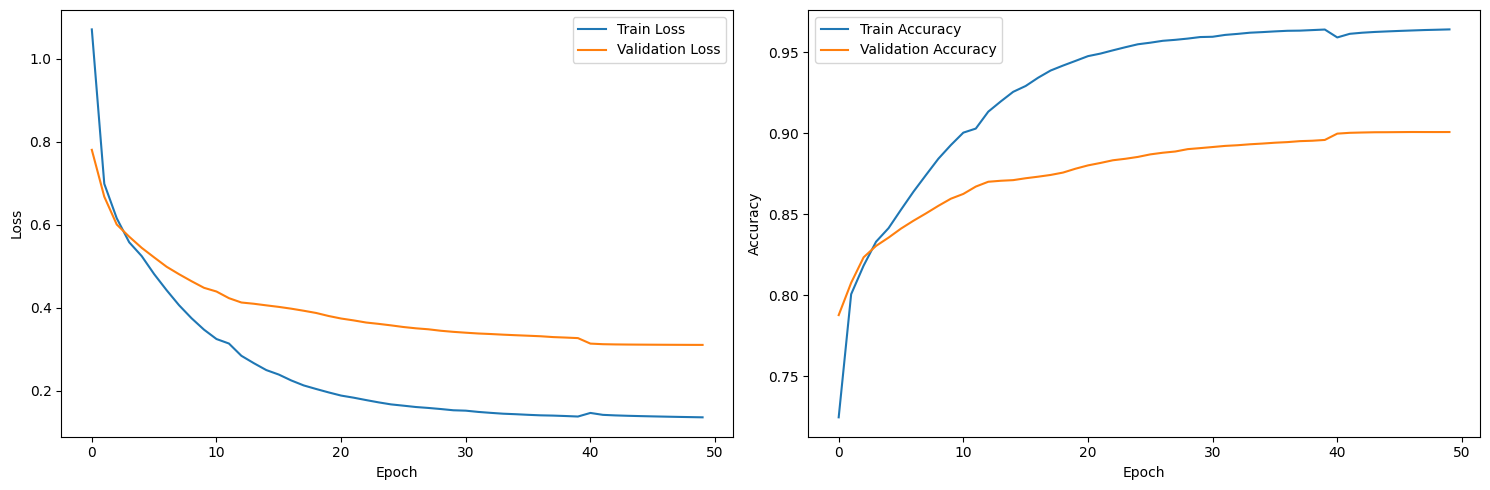

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].plot(history.history['loss'],label='Train Loss')
axes[0].plot(history.history['val_loss'],label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history.history['accuracy'],label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'],label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()

In [ ]:
model.evaluate(valid_ds)

460/460 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8991 - loss: 0.3175


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


[0.31026244163513184, 0.9007978439331055]

#Model_4

In [ ]:
model_4=tf.keras.Sequential([])
model_4.add(tf.keras.layers.Input(shape=[None]))
model_4.add(tf.keras.layers.Embedding(input_dim=82,output_dim=7)),
model_4.add(tf.keras.layers.Conv1D(32, kernel_size=2, padding="causal", activation="relu")),
model_4.add(tf.keras.layers.BatchNormalization())
for rate in(4,6,8):
  model_4.add(tf.keras.layers.Conv1D(filters=rate*10,padding='causal',kernel_size=2,activation='relu',dilation_rate=rate)),
  model_4.add(tf.keras.layers.BatchNormalization()),
model_4.add(tf.keras.layers.GRU(256,return_sequences=True)),
model_4.add(tf.keras.layers.LSTM(256,return_sequences=True)),
model_4.add(tf.keras.layers.LSTM(183,return_sequences=True)),
model_4.add(tf.keras.layers.Dense(82,activation='softmax'))
model_4.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, None, 7)        │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_32 (Conv1D)              │ (None, None, 32)       │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, None, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_33 (Conv1D)              │ (None, None, 40)       │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, None, 40)       │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_34 (Conv1D)              │ (None, None, 60)       │         4,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, None, 60)       │           240 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_35 (Conv1D)              │ (None, None, 80)       │         9,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, None, 80)       │           320 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, None, 256)      │       259,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, None, 256)      │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, None, 183)      │       322,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, None, 82)       │        15,088 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,141,106 (4.35 MB)

 Trainable params: 1,140,682 (4.35 MB)

 Non-trainable params: 424 (1.66 KB)

In [ ]:
def lr_schedule_exp(epoch):
  if epoch<40:
    return float(tf.exp(-epoch/10.)*0.01)/2
  else:
    return 0.0001/5
learning_rate_callback=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
checkpoint=tf.keras.callbacks.ModelCheckpoint('model_4.keras',monitor='val_accuracy',mode='max',save_best_only=True,verbose=1)

In [ ]:
model_4.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Nadam(),metrics=["accuracy"])
history_4=model_4.fit(train_ds_ext, epochs=50, validation_data=valid_ds,callbacks=[learning_rate_callback,checkpoint],steps_per_epoch=618)

Epoch 1/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3280 - loss: 2.4623
Epoch 1: val_accuracy improved from -inf to 0.65768, saving model to model_4.keras
618/618 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.3282 - loss: 2.4613 - val_accuracy: 0.6577 - val_loss: 1.2025 - learning_rate: 0.0050
Epoch 2/50
  1/618 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.6252 - loss: 1.3165

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


617/618 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6866 - loss: 1.1142
Epoch 2: val_accuracy improved from 0.65768 to 0.74906, saving model to model_4.keras
618/618 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.6867 - loss: 1.1139 - val_accuracy: 0.7491 - val_loss: 0.9057 - learning_rate: 0.0045
Epoch 3/50
617/618 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7542 - loss: 0.8837
Epoch 3: val_accuracy improved from 0.74906 to 0.77459, saving model to model_4.keras
618/618 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.7542 - loss: 0.8836 - val_accuracy: 0.7746 - val_loss: 0.8026 - learning_rate: 0.0041
Epoch 4/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7756 - loss: 0.7876
Epoch 4: val_accuracy improved from 0.77459 to 0.78776, saving model to model_4.keras
618/618 ━━━━━━━━━━━━━━━━━━━━ 39s 64ms/step - accuracy: 0.7756 - loss: 0.7876 - val_accuracy: 0.7878 - val_loss: 0.7277 - learning_rate: 0.0037
Epoch 5/50
617/618 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy

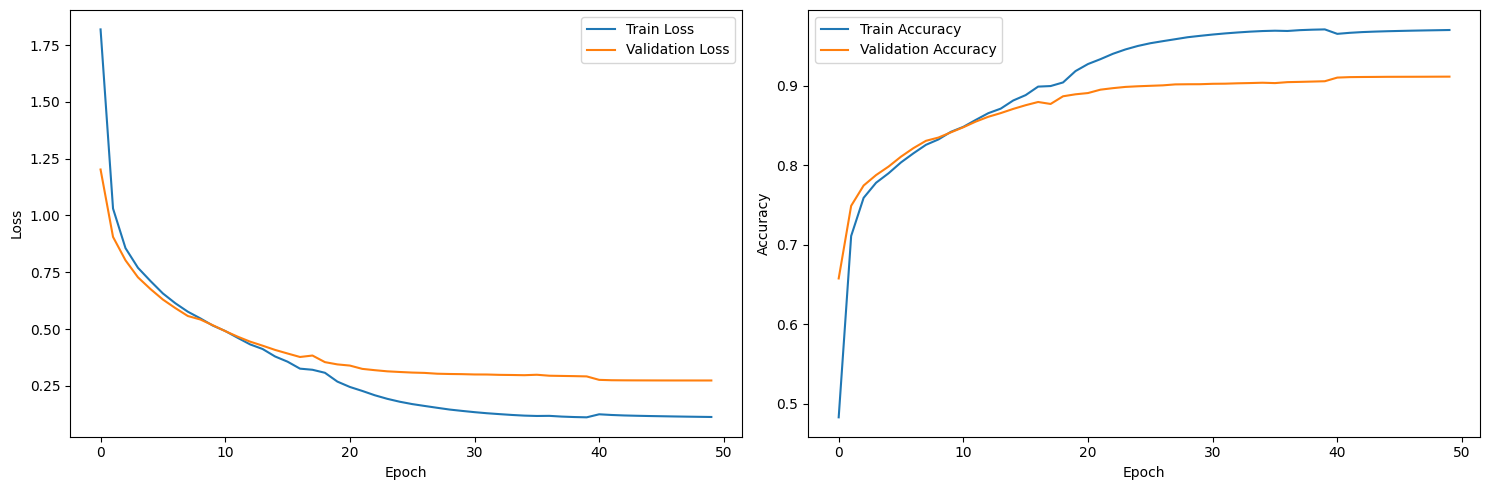

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].plot(history_4.history['loss'],label='Train Loss')
axes[0].plot(history_4.history['val_loss'],label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history_4.history['accuracy'],label='Train Accuracy')
axes[1].plot(history_4.history['val_accuracy'],label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()

In [ ]:
model_4.evaluate(valid_ds.repeat(),steps=618)

618/618 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9101 - loss: 0.2780


[0.2752293348312378, 0.9110469222068787]

# Model_5

In [14]:
model_5=tf.keras.Sequential([])
model_5.add(tf.keras.layers.Input(shape=[None]))
model_5.add(tf.keras.layers.Embedding(input_dim=82,output_dim=7)),
model_5.add(tf.keras.layers.LSTM(256,return_sequences=True)),
model_5.add(tf.keras.layers.BatchNormalization())
model_5.add(tf.keras.layers.GRU(256,return_sequences=True)),
model_5.add(tf.keras.layers.LSTM(183,return_sequences=True)),
model_5.add(tf.keras.layers.BatchNormalization())
model_5.add(tf.keras.layers.Dense(82,activation='softmax'))
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, None, 7)        │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, None, 256)      │       270,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, None, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, None, 256)      │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, None, 183)      │       322,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, None, 183)      │           732 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, None, 82)       │        15,088 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,004,586 (3.83 MB)

 Trainable params: 1,003,708 (3.83 MB)

 Non-trainable params: 878 (3.43 KB)

In [15]:
def lr_schedule_exp(epoch):
  if epoch<80:
    return float(tf.exp(-epoch/10.)*0.01)
  else:
    return 0.00001/5

learning_rate_callback=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
checkpoint=tf.keras.callbacks.ModelCheckpoint('model_5.keras',monitor='val_accuracy',mode='max',save_best_only=True,verbose=1)

In [16]:
model_5.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Nadam(),metrics=["accuracy"])
history_5=model_5.fit(train_ds_ext, epochs=100, validation_data=valid_ds,callbacks=[learning_rate_callback,checkpoint],steps_per_epoch=618)

Epoch 1/100
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3510 - loss: 2.4134
Epoch 1: val_accuracy improved from -inf to 0.51209, saving model to model_5.keras
618/618 ━━━━━━━━━━━━━━━━━━━━ 34s 42ms/step - accuracy: 0.3512 - loss: 2.4124 - val_accuracy: 0.5121 - val_loss: 1.7059 - learning_rate: 0.0100
Epoch 2/100
  1/618 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.6030 - loss: 1.4833

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6799 - loss: 1.2109
Epoch 2: val_accuracy improved from 0.51209 to 0.68034, saving model to model_5.keras
618/618 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.6799 - loss: 1.2108 - val_accuracy: 0.6803 - val_loss: 1.1692 - learning_rate: 0.0090
Epoch 3/100
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7315 - loss: 1.0371
Epoch 3: val_accuracy improved from 0.68034 to 0.68988, saving model to model_5.keras
618/618 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.7315 - loss: 1.0370 - val_accuracy: 0.6899 - val_loss: 1.1053 - learning_rate: 0.0082
Epoch 4/100
617/618 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7434 - loss: 0.9830
Epoch 4: val_accuracy improved from 0.68988 to 0.74911, saving model to model_5.keras
618/618 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.7434 - loss: 0.9830 - val_accuracy: 0.7491 - val_loss: 0.9475 - learning_rate: 0.0074
Epoch 5/100
617/618 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accur

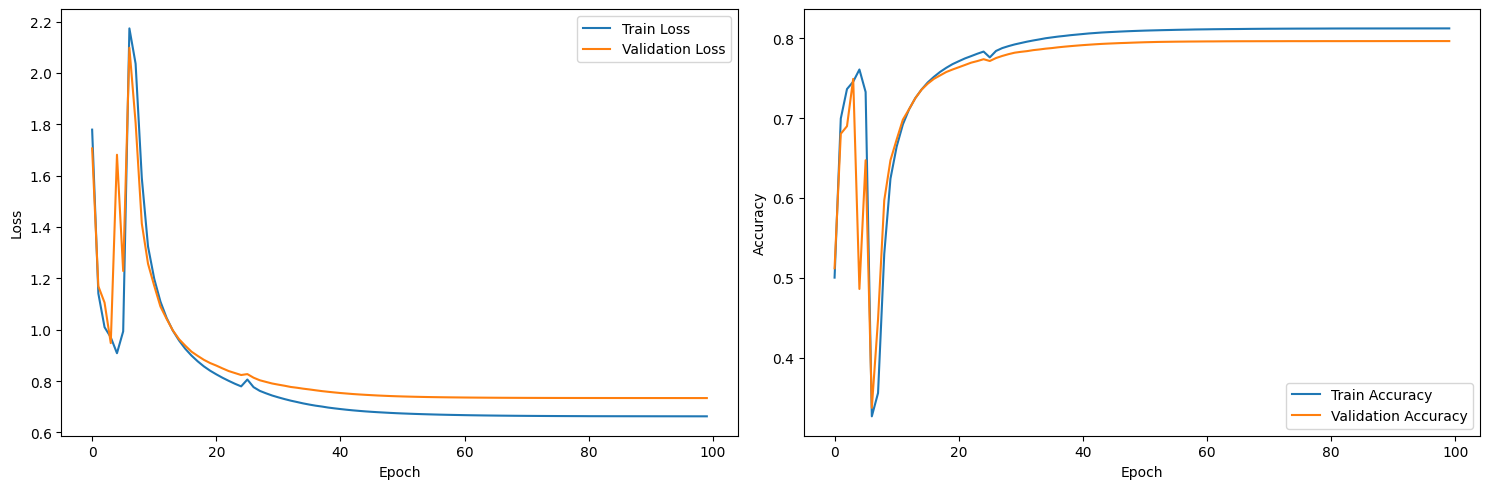

In [18]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].plot(history_5.history['loss'],label='Train Loss')
axes[0].plot(history_5.history['val_loss'],label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history_5.history['accuracy'],label='Train Accuracy')
axes[1].plot(history_5.history['val_accuracy'],label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()